# The Natural Language Toolkit (NLTK) is a platform used for building Python programs that work with human language data

In [2]:
import nltk

In [3]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  d



Download which package (l=list; x=cancel)?


  Identifier>  l


Packages:
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] comparative_sentences Comparative Sentence Dataset
  [ ] dolch............... Dolch Word List
  [ ] extended_omw........ Extended Open Multilingual WordNet
  [ ] framenet_v15........ FrameNet 1.5
  [ ] framenet_v17........ FrameNet 1.7
  [-] inaugural........... C-Span Inaugural Address Corpus
  [ ] mwa_ppdb............ The monolingual word aligner (Sultan et al.
                           2015) subset of the Paraphrase Database.
  [ ] nombank.1.0......... NomBank Corpus 1.0
  [ ] nonbreaking_prefixes Non-Breaking Prefixes (Moses Decoder)
  [ ] omw-1.4............. Open Multilingual Wordnet
  [ ] panlex_swadesh...... PanLex Swadesh Corpora
  [ ] pe08................ Cross-Framework and Cross-Domain Parser
                           Evaluation Shared Task
  [ ] perluniprops........ perluniprops: Index of Unicode Version 7.0.0
                           character properties in Perl
  [-] sinica_treeb

Hit Enter to continue:  q



Download which package (l=list; x=cancel)?


  Identifier>  stopwords


      Unzipping corpora/stopwords.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  q


In [4]:
messages=[line.rstrip() for line in open('../input/smsspamcollection/SMSSpamCollection')]

In [5]:
print(len(messages))

5574


In [6]:
messages[9]

'spam\tHad your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030'

In [7]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no,message)
    print("\n")

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [9]:
import pandas as pd

In [80]:
messages=pd.read_csv('../input/smsspamcollection/SMSSpamCollection', sep='\t', names=['label', 'message'])
messages.sample(10)

,label,message
2254,ham,Lol enjoy role playing much?
3602,ham,"Jay told me already, will do"
4393,ham,what are your new years plans?
1630,ham,Sounds like you have many talents! would you l...
2246,ham,How did you find out in a way that didn't incl...
73,ham,K..k:)where are you?how did you performed?
2241,ham,K I'll call you when I'm close
1835,ham,I have a rather prominent bite mark on my righ...
3344,ham,"I haven't forgotten you, i might have a couple..."
1435,ham,I asked sen to come chennai and search for job.


In [12]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [13]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [14]:
messages['length']=messages['message'].apply(len)

In [15]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

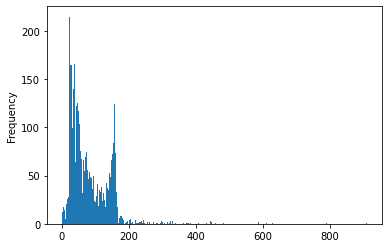

In [17]:
messages['length'].plot.hist(bins=500)

In [18]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [19]:
messages[messages['length']==910]

,label,message,length
1085,ham,For me the love should start with attraction.i...,910


In [20]:
messages[messages['length']==910]['message']

1085    For me the love should start with attraction.i...
Name: message, dtype: object

In [21]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

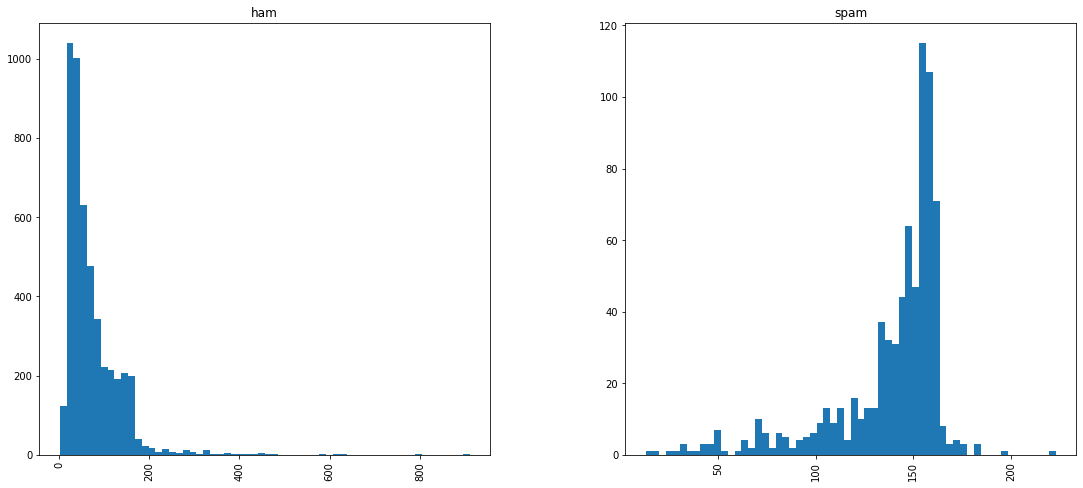

In [22]:
messages.hist(column='length', by='label', bins=60, figsize=(18,8))
plt.show()

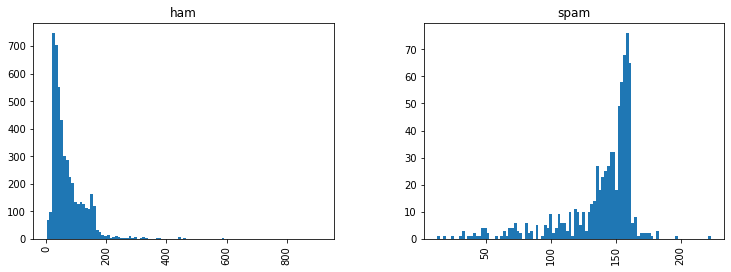

In [23]:
messages.hist(column='length', by='label', bins=100, figsize=(12,4))
plt.show()

***TEXT PREPROCESSING***

In [24]:
import string

In [25]:
mess='Sample message! Notice : it has punctuation'
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
nopunc=[c for c in mess if c not in string.punctuation]

In [27]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [28]:
from nltk.corpus import stopwords

In [29]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [30]:
nopunc=''.join(nopunc)

In [31]:
nopunc

'Sample message Notice  it has punctuation'

In [32]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [33]:
clean_mess=[word for word in nopunc.split() if word not in stopwords.words('english')]

In [34]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [35]:
def text_process(mess):
    """
    1.REMOVE PUNC
    2. REMOVE STOPWORDS
    3. RETURN LIST OF CLEAN TEXT WORDS
    """
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [36]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [37]:
messages['message'].head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

In [38]:
messages['message'].head().apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

VECTORTIZATION
* TERM FREQUENCY
* INVERSE DOCUMENT FREQUENCY
* L2 NORM

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

In [40]:
bow_transformer=CountVectorizer(analyzer=text_process).fit(messages['message'])

In [41]:
print(len(bow_transformer.vocabulary_))

11425


In [42]:
type(bow_transformer)

sklearn.feature_extraction.text.CountVectorizer

In [43]:
mess4=messages['message'][3]
mess4

'U dun say so early hor... U c already then say...'

In [44]:
bow4=bow_transformer.transform([mess4])

In [45]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [46]:
print(bow4.shape)

(1, 11425)


In [47]:
print(type(bow4))

<class 'scipy.sparse.csr.csr_matrix'>


In [48]:
print(bow_transformer.transform([messages['message'][9]]))
print("\n")
print(bow_transformer.transform([messages['message'][11]]))

  (0, 58)	1
  (0, 315)	1
  (0, 1417)	1
  (0, 1492)	1
  (0, 1865)	1
  (0, 1941)	1
  (0, 2852)	1
  (0, 3321)	1
  (0, 4068)	1
  (0, 4128)	2
  (0, 5304)	1
  (0, 5594)	1
  (0, 6328)	1
  (0, 7716)	1
  (0, 8216)	1
  (0, 8217)	1
  (0, 8251)	1


  (0, 294)	1
  (0, 364)	1
  (0, 382)	1
  (0, 427)	1
  (0, 605)	1
  (0, 763)	1
  (0, 875)	1
  (0, 1353)	1
  (0, 1405)	1
  (0, 1524)	1
  (0, 2139)	1
  (0, 3414)	1
  (0, 3495)	1
  (0, 4048)	1
  (0, 4731)	1
  (0, 5411)	1
  (0, 7354)	1
  (0, 8975)	1
  (0, 9641)	1
  (0, 10686)	1
  (0, 11084)	1


In [49]:
bow_transformer.get_feature_names()[4068]

'U'

In [50]:
bow_transformer.get_feature_names()[11084]

'win'

In [51]:
bow_transformer.get_feature_names()[8233]

'moment'

In [52]:
messages_bow = bow_transformer.transform(messages['message'])

In [53]:
print('Shape of the Sparse Matrix : ',messages_bow.shape)

Shape of the Sparse Matrix :  (5572, 11425)


In [54]:
print(messages_bow)

  (0, 1110)	1
  (0, 1483)	1
  (0, 2060)	1
  (0, 4653)	1
  (0, 5217)	1
  (0, 5218)	1
  (0, 5769)	1
  (0, 6217)	1
  (0, 6906)	1
  (0, 6937)	1
  (0, 7555)	1
  (0, 7668)	1
  (0, 8336)	1
  (0, 8917)	1
  (0, 10965)	1
  (0, 11163)	1
  (1, 2451)	1
  (1, 3064)	1
  (1, 7701)	1
  (1, 8590)	1
  (1, 10698)	1
  (1, 11072)	1
  (2, 73)	1
  (2, 423)	1
  (2, 430)	1
  :	:
  (5568, 6691)	1
  (5568, 6882)	1
  (5568, 7159)	1
  (5568, 11418)	1
  (5569, 3228)	1
  (5569, 3721)	1
  (5569, 8252)	1
  (5569, 10199)	1
  (5570, 4508)	1
  (5570, 5055)	1
  (5570, 5251)	1
  (5570, 6282)	1
  (5570, 6699)	1
  (5570, 6799)	1
  (5570, 6984)	1
  (5570, 7287)	1
  (5570, 7394)	1
  (5570, 7800)	1
  (5570, 8420)	1
  (5570, 9915)	1
  (5570, 10787)	1
  (5570, 11006)	1
  (5571, 3431)	1
  (5571, 8348)	1
  (5571, 10648)	1


In [55]:
messages_bow.nnz

50548

FORMULA FOR SPARSITY OF THE SPARSE MATRIX

In [56]:
sparsity=(100.0*messages_bow.nnz/(messages_bow.shape[0]*messages_bow.shape[1]))
print("sparsity :- ",round(sparsity,6))

sparsity :-  0.079403


PRINTING INVERSE DOCUMENT FREQUENCEY

In [57]:
from sklearn.feature_extraction.text import TfidfTransformer

In [58]:
tfidf_transformer=TfidfTransformer().fit(messages_bow)

In [59]:
tfidf4=tfidf_transformer.transform(bow4)

In [60]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [61]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [62]:
messages_tfidf=tfidf_transformer.transform(messages_bow)

In [63]:
from sklearn.naive_bayes import MultinomialNB

In [64]:
spam_detect_model=MultinomialNB().fit(messages_tfidf,messages['label'])

In [65]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [66]:
messages['label'][3]

'ham'

In [67]:
all_pred=spam_detect_model.predict(messages_tfidf)

In [68]:
print(all_pred)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


WE WILL DO NOW SPLIT OUR TRAIN AND TEST DATAS

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
mes_train,mes_test,label_train,label_test=train_test_split(messages['message'],messages['label'],test_size=0.3)

In [71]:
mes_train

1085    For me the love should start with attraction.i...
2259    Sad story of a Man - Last week was my b'day. M...
3286    They are just making it easy to pay back. I ha...
5540    ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
4412    Ya but it cant display internal subs so i gott...
                              ...                        
1517    I need to come home and give you some good lov...
4753    Well boy am I glad G wasted all night at apple...
1139                                    What * u wearing?
2285                              Velly good, yes please!
2571                     From 5 to 2 only my work timing.
Name: message, Length: 3900, dtype: object

In [72]:
from sklearn.pipeline import Pipeline

In [73]:
pipeline=Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [74]:
pipeline.fit(mes_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fc290b26ef0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [78]:
from sklearn.metrics import classification_report, confusion_matrix

In [76]:
predictions=pipeline.predict(mes_test)

In [77]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1443
        spam       1.00      0.71      0.83       229

    accuracy                           0.96      1672
   macro avg       0.98      0.86      0.90      1672
weighted avg       0.96      0.96      0.96      1672



In [79]:
print(confusion_matrix(label_test, predictions))

[[1443    0]
 [  66  163]]
